In [1]:
# !pip install ortools


# Scenario 1


In [118]:
from ortools.sat.python import cp_model
from itertools import combinations

# List of the people and abilities
people_abilities = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

# positions needed
position_list = ["Python", "AI", "Web", "Database", "Systems"]

# Create the CP-SAT model
model = cp_model.CpModel()

# Variables: 0 if not selected, 1 if selected
variables = {person: model.NewBoolVar(person) for person in people_abilities}

# Add the Constraints
# Select exactly 3 people
# Ciara must be selected
# Ensure all skills are covered
model.Add(sum(variables.values()) == 3)
model.Add(variables["Ciara"] == 1)
for skill in list_skills:
    model.Add(sum(variables[person] for person, skills in people_abilities.items() if skill in skills) >= 1)

# Backtracking function 
def backtrack(assignment, start_index=0):
    if len(assignment) == 3 and satisfies_constraints(assignment):
        return [sorted(assignment)]  
    else:
        result = []
        for person in variables.keys():
            if person not in assignment:
                result.extend(backtrack(assignment + [person], start_index))
        return result

# Constraint satisfaction function
def satisfies_constraints(combination):
    combined_skills_positions = [skill for person in combination for skill in people_abilities.get(person, [])]
    return all(skill in combined_skills_positions for skill in position_list) and \
           sum("AI" in people_abilities[person] for person in combination) >= 2

# Print unique combinations 
unique_combinations = set(map(tuple, backtrack([])))
for combination in unique_combinations:
    print("Combination:")
    for person in combination:
        skills = ', '.join(people_abilities[person])
        print(f"{person}: {skills}")
    print()




Combination:
Jane: Python, Database
Jim: AI, Systems
Juan: Web, AI

Combination:
Anita: Web, AI
Jane: Python, Database
Jim: AI, Systems



# Scenario 2

In [121]:
from ortools.sat.python import cp_model


# List for the people and abilities
people_abilities = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

# positions needed
position_list = ["Python", "AI", "Web", "Database", "Systems"]

# Create the CP-SAT model
model = cp_model.CpModel()

# Variables: 0 if not selected, 1 if selected
variables = {person: model.NewBoolVar(person) for person in people_abilities}

# Constraints: 
# Select exactly 4 people 
# Ciara and Juan must be selected
# Ensure all skills are covered
model.Add(sum(variables.values()) == 4)
model.Add(variables["Ciara"] == 1)
model.Add(variables["Juan"] == 1)
for skill in position_list:
    model.Add(sum(variables[person] for person, skills in people_abilities.items() if skill in skills) >= 1)

# Backtracking function 
def backtrack(assignment, start_index=0):
    if len(assignment) == 4 and satisfies_constraints(assignment):
        return [sorted(assignment)]  
    else:
        result = []
        for person in variables.keys():
            if person not in assignment:
                result.extend(backtrack(assignment + [person], start_index))
        return result

# Constraint satisfaction function
def satisfies_constraints(combination):
    combined_skills_position = [skill for person in combination for skill in people_abilities.get(person, [])]
    return all(skill in combined_skills_position for skill in position_list) and \
           sum("AI" in people_abilities[person] for person in combination) == 3 and \
           sum("Python" in people_abilities[person] for person in combination) == 2

# Print unique combinations 
unique_combinations = set(map(tuple, backtrack([])))
for combination in unique_combinations:
    print("Combination:")
    for person in combination:
        skills = ', '.join(people_abilities[person])
        print(f"{person}: {skills}")
    print()



Combination:
Anita: Web, AI
Jane: Python, Database
Jim: AI, Systems
Peter: Python, AI

Combination:
Jane: Python, Database
Jim: AI, Systems
Juan: Web, AI
Peter: Python, AI



# Visualisation Scenario 1

In [1]:
# pip install networkx


Note: you may need to restart the kernel to use updated packages.


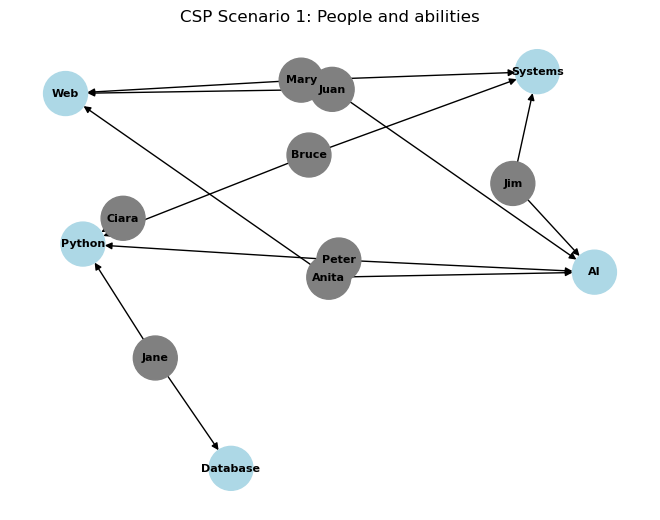

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# List for the people and abilities
people_abilities = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

# List desired positions
list_positions = ["Python", "AI", "Web", "Database", "Systems"]

# Create the graph
G = nx.DiGraph()
G.add_nodes_from(people_abilities.keys(), color='grey')  # Set default color for people
for skill in list_positions:
    G.add_node(skill, color='lightblue')
    
for person, skills in people_abilities.items():
    for skill in skills:
        G.add_edge(person, skill)
        
# Set node colors 
node_colors = [G.nodes[node].get('color', 'grey') for node in G.nodes]

# Adjust the positions for Juan and Anita because they have the same abilities
pos["Juan"] = (pos["Juan"][0], pos["Juan"][1] + 0.1)
pos["Anita"] = (pos["Anita"][0], pos["Anita"][1] - 0.1)


# plot the graph
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color=node_colors, font_size=8)

plt.title("CSP Scenario 1: People and abilities")
plt.show()


Combination:
Jane: Python, Database
Jim: AI, Systems
Juan: Web, AI

Combination:
Anita: Web, AI
Jane: Python, Database
Jim: AI, Systems



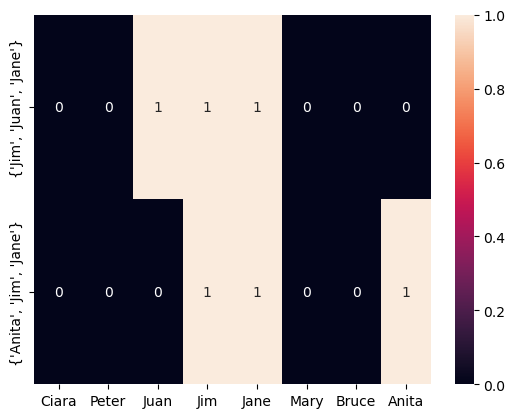

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

from ortools.sat.python import cp_model
from itertools import combinations

# List of the people and abilities
people_abilities = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

# positions needed
position_list = ["Python", "AI", "Web", "Database", "Systems"]

# Create the CP-SAT model
model = cp_model.CpModel()

# Variables: 0 if not selected, 1 if selected
variables = {person: model.NewBoolVar(person) for person in people_abilities}

# Add the Constraints
# Select exactly 3 people
# Ciara must be selected
# Ensure all skills are covered
model.Add(sum(variables.values()) == 3)
model.Add(variables["Ciara"] == 1)
for skill in list_skills:
    model.Add(sum(variables[person] for person, skills in people_abilities.items() if skill in skills) >= 1)

# Backtracking function 
def backtrack(assignment, start_index=0):
    if len(assignment) == 3 and satisfies_constraints(assignment):
        return [sorted(assignment)]  
    else:
        result = []
        for person in variables.keys():
            if person not in assignment:
                result.extend(backtrack(assignment + [person], start_index))
        return result

# Constraint satisfaction function
def satisfies_constraints(combination):
    combined_skills_positions = [skill for person in combination for skill in people_abilities.get(person, [])]
    return all(skill in combined_skills_positions for skill in position_list) and \
           sum("AI" in people_abilities[person] for person in combination) >= 2

unique_combinations = set(map(tuple, backtrack([])))
for combination in unique_combinations:
    print("Combination:")
    for person in combination:
        skills = ', '.join(people_abilities[person])
        print(f"{person}: {skills}")
    print()

# Select the combinations for the heatmap
combinations_for_heatmap = [set(combination) for combination in unique_combinations]

# Create a matrix for the heatmap
heatmap_matrix = [[1 if person in combination else 0 for person in people_abilities.keys()] for combination in combinations_for_heatmap]

# Heatmap
sns.heatmap(heatmap_matrix, annot=True, xticklabels=list(people_abilities.keys()), yticklabels=list(map(str, combinations_for_heatmap)))

plt.show()